# Revisão Machine Learning

## Importação de arquivos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('datasetaqui.csv')

## Padronização dos Dados

### Standard Scaler

Responsável por deixar todos os dados em uma mesma escala. 
* Centraliza a média em 0
* Ajusta o desvio padrão para 1
  
É necessário usá-lo em modelos que usem **regularização**, visto que eles podem interpretar dados maiores como mais importantes, o que nem sempre é verdade.

#### Fórmula

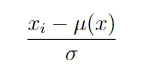
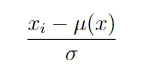

#### Código

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) # aprende média e desvio nos dados
x_test = scaler.transform(x_test) # aplica

## Encoder

### Label Encoding

Cada classe terá seu rótulo transformado para um valor numérico

* É comumente utilizado em algoritmos de **Classificação**
  
* É utilizado em dados ordenáveis, como:
  * Bronze, prata e ouro;
  * Criança, adulto e idoso;
  * Baixo, médio e alto.
   
É preciso criar um objeto LabelEncoder **para cada coluna**

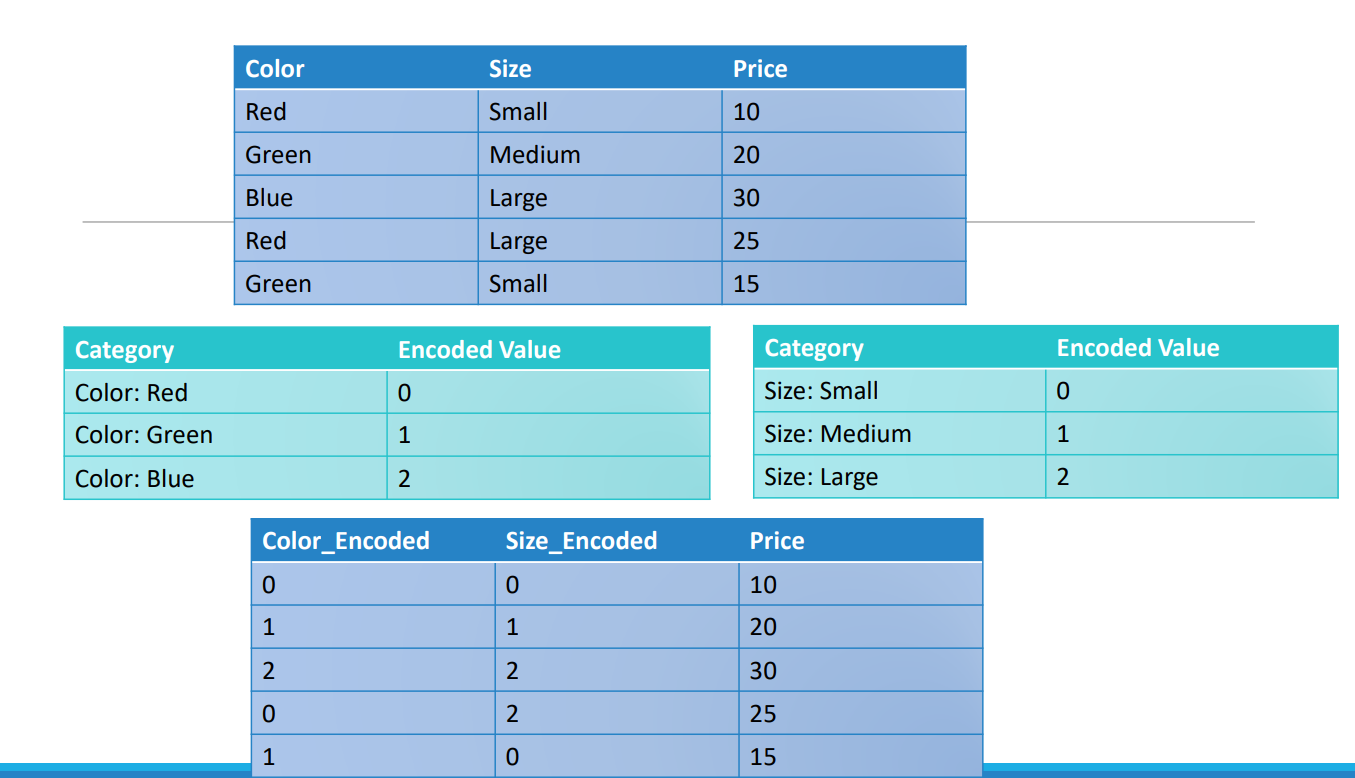

#### Código

In [ ]:
from sklearn.preprocessing import LabelEncoder

encoding_col1 = LabelEncoder()
endoding_col2 = LabelEncoder()

x[:,1] = encoding_col1.fit_transform(x[:,1])
x[:,2] = encoding_col2.fit_transform(x[:,2])


### One-hot Encoding

Cada categoria é transformada em um atributo: dummy variable, um valor binário que informa a ocorrência

#### Quando utilizar?

* Quando a variável categórica **não tem ordem** (nominal);
* Quando o número de categorias não é muito **grande**;

#### Observações

* Muitas colunas podem gerar um espaço de características de alta dimensão, que pode
causar super ajuste e ter um custo computacional muito alto.
* Maldição da Dimensionaldiade: Dados esparços, muitas colunas com valor zero,
tornando difícil encontrar valores nos dados
* Dummy Variable Trap: valores de colunas binárias podem ser previstos a partir dos
valores de outras colunas.

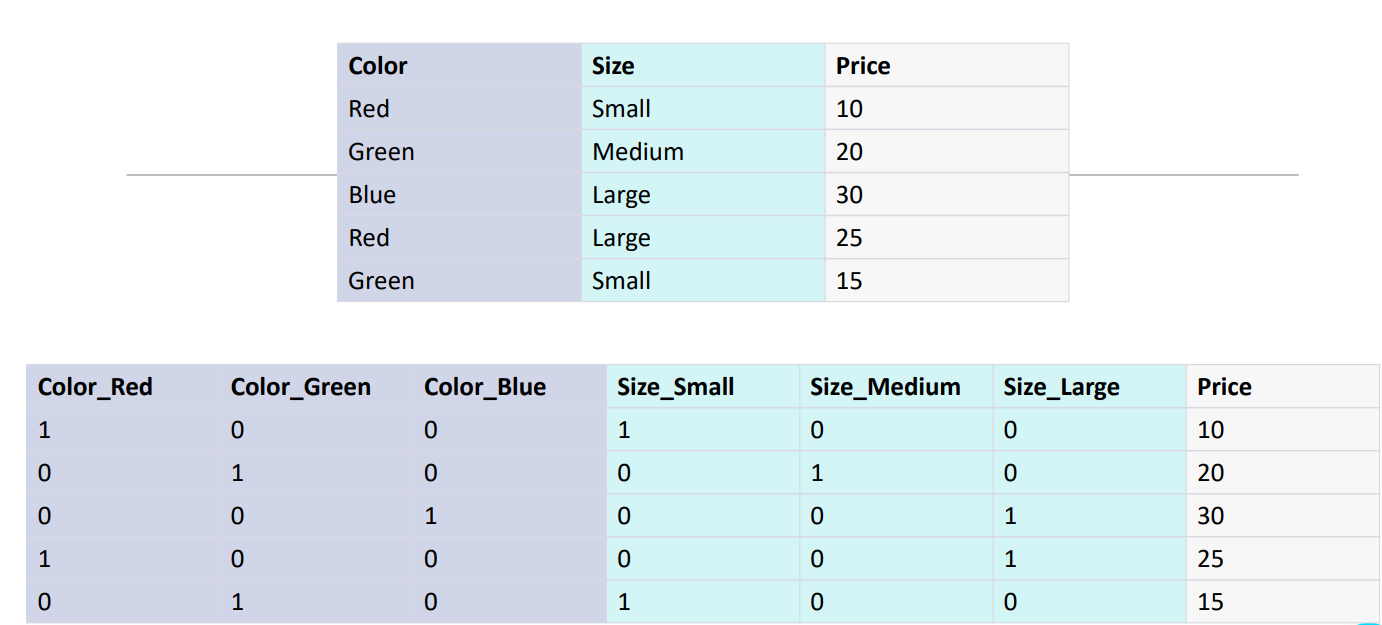

#### Código

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose mport ColumnTransformer

onehotX = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(handle_unknown='ignore', [6,7], remainder='passthrough')
x = onehotX.fit_transform(x)


## Regressão

* **Não** possui hiperparâmetro
* **Métrica de erro:** MAE
* **Métrica de desempenho:** Score


#### MAE

Mean Absolute Error

In [ ]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, prev)

#### Score


In [ ]:
regressor.score(x_train, y_train)
regressor.score(x_test, y_test)

### Regressão Linear Simples

Modelagem da relação entre variáveis numéricas (variável dependente y e variáveis explanatórias x)

#### Intersecção

O ponto de encontro da linha no eixo Y, onde X = 0

#### Inclinação 

Fator que determina a inclinação da linha onde a cada unidade que aumenta a variável **independente**(x), a variável de **resposta**(y) sobe o valor da inclinação

#### Fórmula

#### P = b + m * v

**onde:**

**p:** previsão

**b(constante):** intersecção

**m(coeficiente):** inclinação

**v:** valor a ser previsto em x

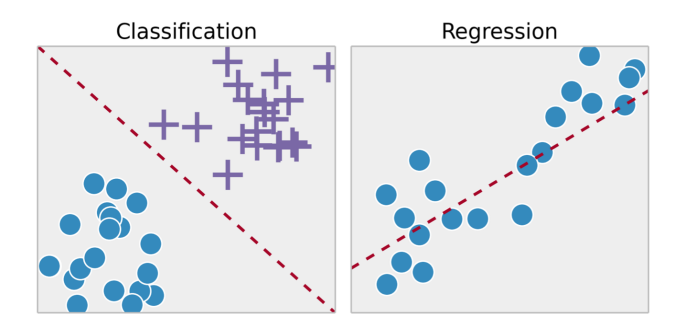


In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x, y)

### Regressão Linear Múltipla


É similar a Regressão Linear **Simples**, porém mais complexa.

* Possui **duas ou mais** variáveis exploratórias

#### Fórmula

P = b + m1 * v1 + m2 * v2 + ... + mn * vm

#### Código


In [ ]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(x_train, y_train)
prev = regressor.predict(x_test)

### Regressão Linear Polinomial

* Usada quando a relação entre x e y é **curva**, e não pode ser representada apenas por uma linha reta.
* Quando falamos em código, falamos em algo basicamente **igual** a uma regressão linear simples. 
* É preciso adequar os dados e criar novas features (elevadas a n) para finalmente treiná-lo

#### Fórmula

P = C + m1 * v1 + m2 * v2 + ... + mn * v1^n

#### Código

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
x_train = poly.fit_transform(x_train)
x_test = poly.transform(x_test)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

### Elastic Net

Utilizado quando temos duas ou mais variáveis exploratórias.
  
Quando temos muitas variáveis, ou quando elas possuem valores muito parecidos, o modelo pode ficar "confuso" e distribuir pesos muito grandes, ocasionando em **overfitting**.

O Elastic usa:

* Ridge para remover exageros
* Lasso para remover variáveis que não são fortemente relacionadas com y.

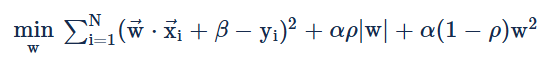

#### Ridge

Penaliza colocando um viés que reduz os grandes pesos o máximo possível, mas sem zerar, assim fazendo com que a variável contribua menos para a predição

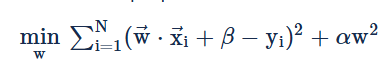

#### Lasso

* Penaliza o valor, assim como o Ridge, mas, ao invés de penalizar apenas os pesos de grande valor, ele penaliza os de baixo valor também.
* A penalização ocorre até que o valor seja zero.
* Os atributos zerados são descartados da predição.

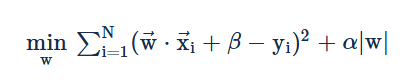

#### Código

In [ ]:
from sklearn.linear_model import ElasticNet

regressor_en = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=0)
regressor_en.fit(x_train, y_train)

prev = regressor_en.predict(x_test)

## Classificação

* **Métrica de erro:** Matriz de confusão
* **Métrica de desempenho:** accuracy_score

### Matriz de confusão (Confusion Matrix)


    

In [ ]:
from yellowbrick.classifier import ConfusionMatrix

plt.figure(figsize=(4,4))
cm = ConfusionMatrix(svm)
cm.fit(x_train, y_train)
cm.score(x_test, y_test)

### Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
previsao = svm.predict(x_test)
accuracy_score(y_test, previsao)

### Naive Bayes

É um algoritmo de classificação que usa o teorema de Bayes para calcular a probabilidade de um dado pertencer a uma classe específica.

Ele é muito usado em classificação de textos, como detecção de spam, análise de sentimentos e categorização de documentos.

* Esse e-mail é spam ou não spam?
* Esse comentário é positivo, neutro ou negativo?
* Esse cliente vai comprar ou não comprar?

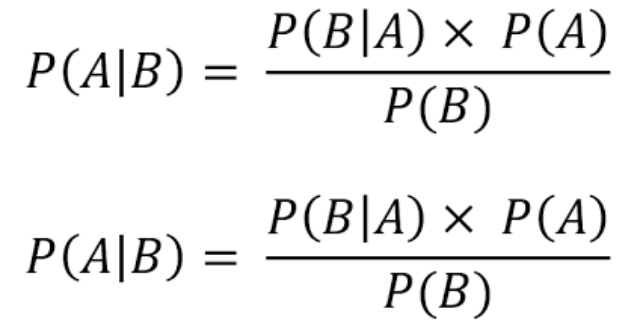

Onde A é cada classe e B a quantidade de dados
Na prática, temos uma base de dados original:

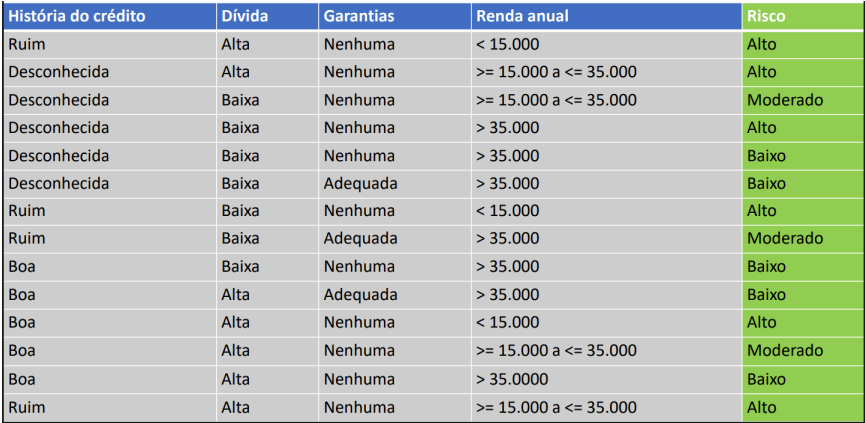

E para cada feature faz a divisão relacionada com a classe que queremos prever

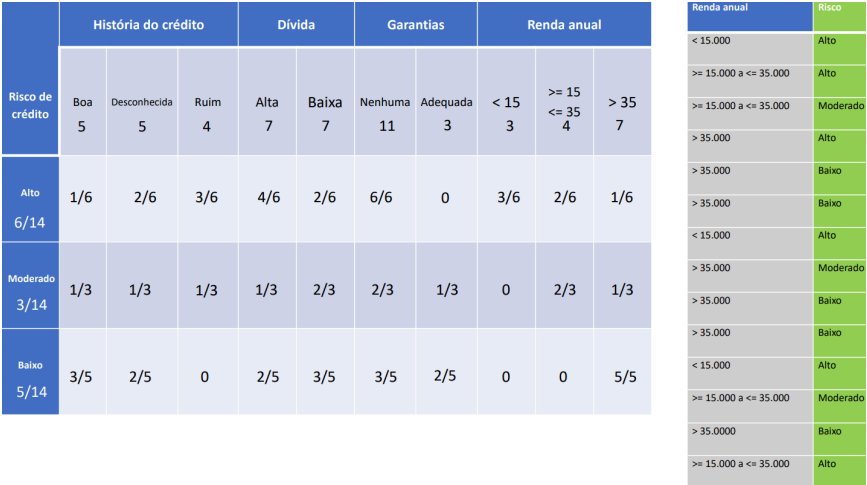

Essa tabela pronta é o que vai gerar o aprendizado do algoritmo, a partir disso podemos prever novos valores com os cálculos de probabilidade de cada classe

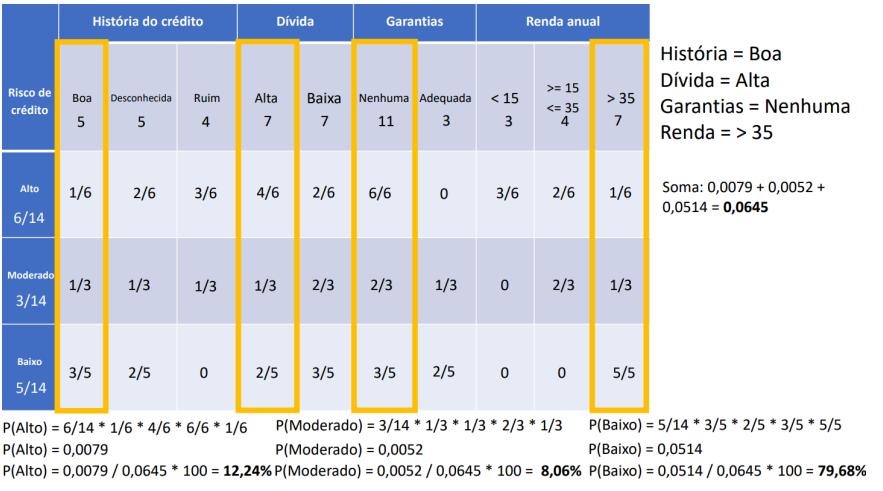

### Métricas de desempenho para classificação

**TP - True Positive:** Quantidade de dados que **eram** de uma classe e foram preditas **corretamente**

**TN - True Negative:** Quantidade de dados que **não** eram de uma classe e foram preditas **corretamente**

**FP - False Positive:** Quantidade de dados que **eram** de uma classe e foram preditas **incorretamente**

**FN - False Negative:** Quantidade de dados que **não** eram de uma classe e foram preditas **incorretamente**

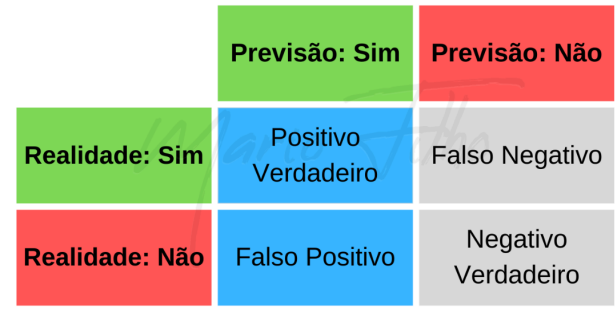

#### Acurácia

Mede a porcentagem/proporção de valores que foram preditos de forma correta. ((tp + tn) /
(tp + tn + fp + fn))

#### Precisão

Retorna a proporção de todos os dados que foram predições corretas apenas para quais seu
modelo apontou como verdadeiras. (tp / (tp + fp)
#### Recall

Retorna a proporção de todos os dados que eram de fato verdadeiras e quantas foram
corretamente preditas como positiva. (tp / (tp + fn)

#### F1_SCORE

Ele é a média harmônica entre a precisão e o recall. 2(precisao*recall/precisao+recall)



In [ ]:
from sklearn.naive_bayes import GaussianNB
import pickle
with open('census.pkl', 'rb') as f:
 X_census_treinamento, y_census_treinamento, X_census_teste, y_census_teste = pick
naive_census = GaussianNB()
naive_census.fit(X_census_treinamento.toarray(), y_census_treinamento)
previsoes = naive_census.predict(X_census_teste.toarray()) #to array não é necessário
previsoes

In [ ]:
print(classification_report(y_census_teste, previsoes))

### KNN (K-Nearest Neighbors)

"K Vizinhos Mais Próximos" — é um algoritmo simples de classificação, que classifica um
novo dado olhando quem são os vizinhos mais próximos dele. Onde o valor de K determina
o número de vizinhos que o modelo vai considerar
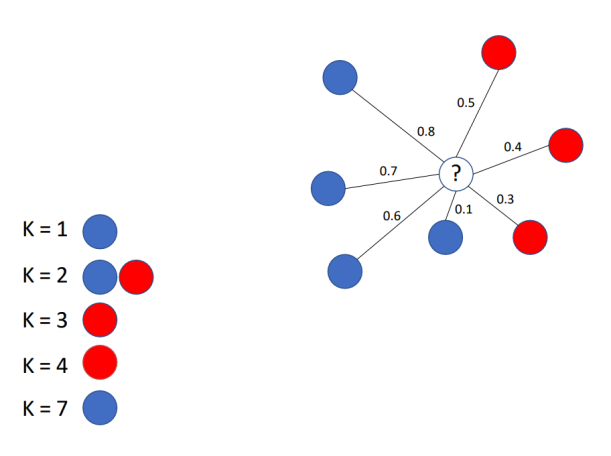

Calcula a distância entre o novo ponto e todos os pontos do conjunto de treinamento
(geralmente usa-se a distância Euclidiana).
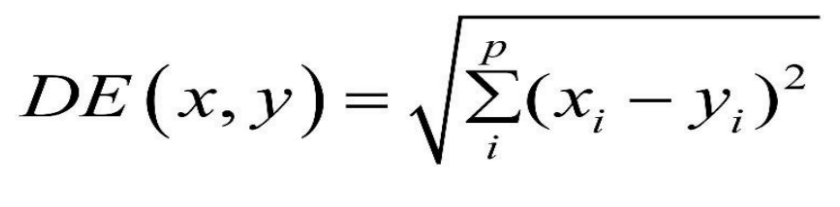

Pega os K vizinhos mais próximos (os que têm menor distância)

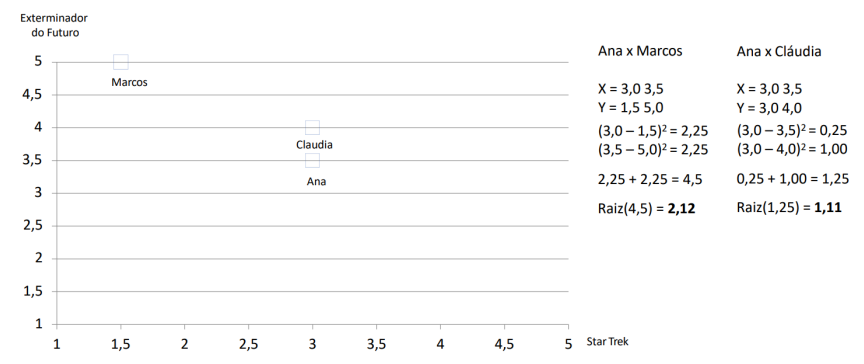

O modelo escolhe a classe mais frequente entre os vizinhos

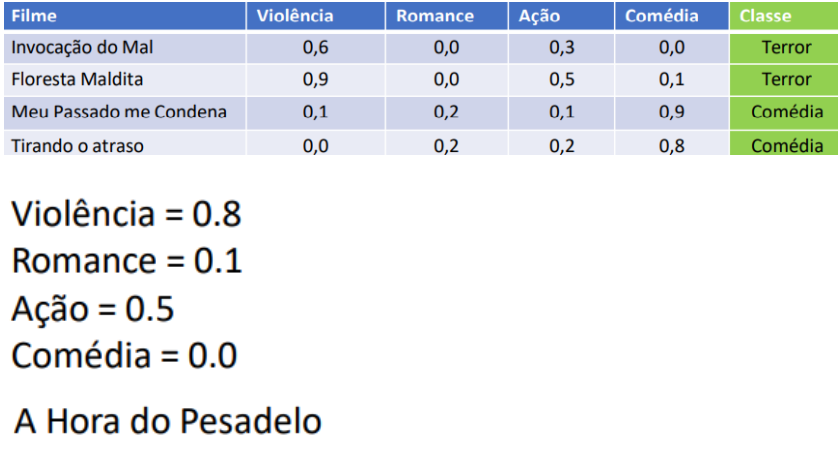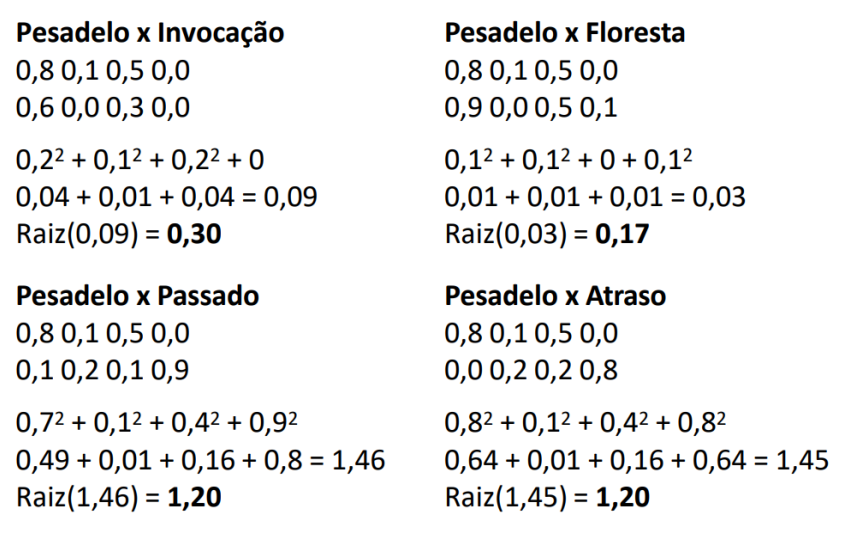

Nesse algoritmo, **não** é criado um modelo, mas sim uma memorização dos dados vizinhos e o cálculo das distâncias para determinar a classe.

#### Código.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
